<a href="https://colab.research.google.com/github/tejuedidi/machine-learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple Linear Regression (two or more independent variables and one dependent variable)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = sns.load_dataset('diamonds') # load_dataset() returns a DataFrame obj
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [4]:
# axis = 0 -> row if 1 -> column
df = df.drop(['depth', 'color', 'table', 'x', 'y', 'z'], axis = 1)

In [5]:
df.describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


In [6]:
print(df.isnull().sum())

carat      0
cut        0
clarity    0
price      0
dtype: int64


Replacing Categorical Value w Numerical

In [7]:
# can do w hot encoding, label encoding, dummy encoding etc
df = df.replace({'cut': {'Ideal': 4, 'Premium': 3, 'Fair': 2, 'Very Good': 1, 'Good': 0}})
df = df.replace({'clarity': {"IF": 8, 'VVS1' :7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1':3, 'SI2': 2, 'I1':1, 'I2':0, 'I3':0}})
df

,carat,cut,clarity,price
0,0.23,4,2,326
1,0.21,3,3,326
2,0.23,0,5,327
3,0.29,3,4,334
4,0.31,0,2,335
...,...,...,...,...
53935,0.72,4,3,2757
53936,0.72,0,3,2757
53937,0.70,1,3,2757
53938,0.86,3,2,2757


Selecting feature and target variables

In [8]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)

After predicting in testing dataset, evaluate model

In [12]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Absolute Error: 899.3877654877708
Mean Squared Error: 1767737.1734232735
R-squared Score: 0.8861163905892646


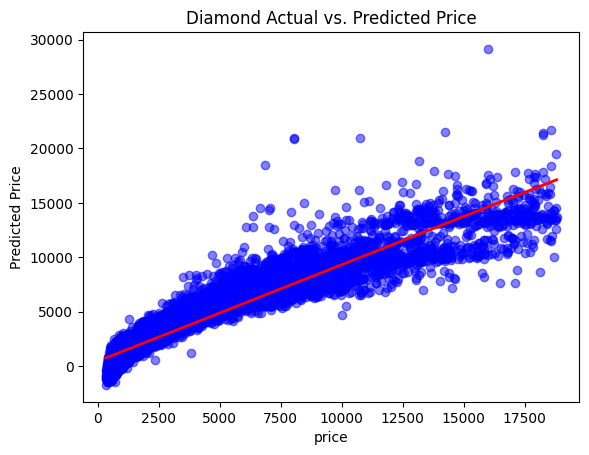

In [13]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Diamond Actual vs. Predicted Price')

# plt.plot(y_test, y_pred, color='red') // doesn't work as it plots each point pair individually connecting via line segment
# sns.regplot() or lmplot() visualizes the relationship between variables with a regression line.

sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={'linewidth': 2})
plt.show()